In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import HeBz

In [2]:
def plot_benzene(ax):
    c = HeBz.benzene()
    for i in range(6):
        ax.plot([c[i][1],c[i+6][1]],[c[i][2],c[i+6][2]],'.-',color='lavender')
    for j in range(6):
        ax.plot([c[j][1],c[(j+1) % 6][1]],[c[j][2],c[(j+1) % 6][2]],'.-',color='black')
    return True

In [4]:
f2 = open('../data/pimc-gp/gce-planeavedensity-02.000-020.000--012.000-0.00500-a4c21c93-0604-4d58-be6a-346a8ec965b7.dat','r')
rho9 = np.genfromtxt(f2,skip_header=3)
rho9 = np.reshape(rho9,(205,205))
f2.close()
f2 = open('../data/pimc-gp/gce-planeavedensity-02.000-020.000--029.000-0.00500-11688857-91cd-4c3a-af4c-d5b0da519211.dat','r')
rho22 = np.genfromtxt(f2,skip_header=3)
rho22 = np.reshape(rho22,(205,205))
f2.close()
f2 = open('../data/pimc-gp/gce-planeavedensity-02.000-020.000--045.000-0.00500-ad015111-8a4e-498a-ba33-3a6d8fba95aad.dat','r')
rho36 = np.genfromtxt(f2,skip_header=3)
rho36 = np.reshape(rho36,(205,205))
f2.close()
x = np.arange(-10,10,9.756098E-02)
y = np.arange(-10,10,9.756098E-02)
f2 = open('../data/pimc-gp/gce-planeavedensity-02.000-020.000--065.000-0.00500-e2c17173-e27d-4190-a94b-b47b9ed0df50.dat','r')
rho60 = np.genfromtxt(f2,skip_header=3)
rho60 = np.reshape(rho60,(205,205))
f2.close()

In [28]:
f2 = open('../data/pimc-gp/estimator-u-reduce.dat','r')
Est = np.genfromtxt(f2)
f2.close()
mus = [-65,-45,-29,-12]
mu = Est[:,0]
Ns = []
for m in range(len(mu)):
    if int(mu[m]) in mus:
        Ns.append(Est[:,19][m])
Ns = Ns[::-1]

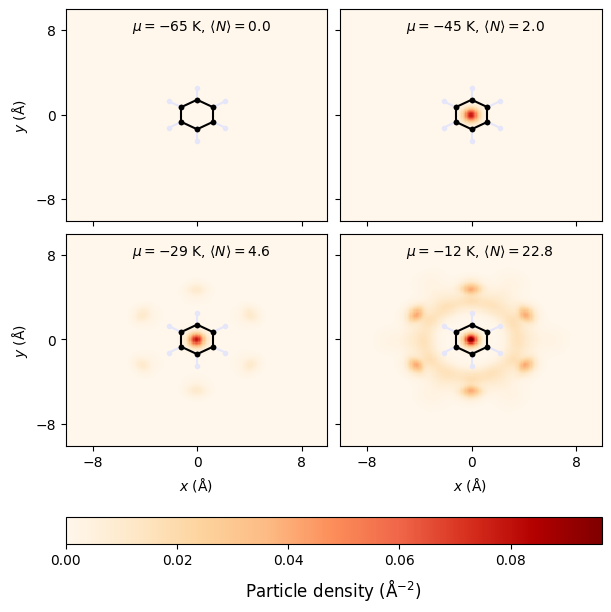

In [42]:
fig, axs = plt.subplots(2,2,figsize=(6,6),sharex=True, sharey=True, constrained_layout=True)
#plt.gcf().set_dpi(500)
from matplotlib import colors

datasets = [rho60,rho36,rho22,rho9]

# create a single norm to be shared across all images
norm = colors.Normalize(vmin=np.min(datasets), vmax=np.max(datasets))

images = []

for ax, data, mu, N in zip(axs.flat, datasets, mus, Ns):
    ax.text(-5,8,r'$\mu = %2d$ K, $\langle N\rangle = %.1f$'  % (mu, N))
    images.append(ax.pcolormesh(x,y,data, norm=norm, cmap = 'OrRd'))
    plot_benzene(ax)
axs.flat[0].set_yticks([-8.0,0,8.0])
axs.flat[0].set_xticks([-8.0,0,8.0])
axs.flat[3].set_xlabel(r'$x$ (Å) ')
axs.flat[0].set_ylabel(r'$y$ (Å) ')
axs.flat[2].set_ylabel(r'$y$ (Å) ')
axs.flat[2].set_xlabel(r'$x$ (Å) ')
cbar = fig.colorbar(images[0], ax=axs, orientation='horizontal', fraction=.1)
cbar.set_label('Particle density (Å$^{-2}$)', fontsize=12, labelpad=6)
plt.savefig('../figures/Fig9b.pdf')